# FTE/BTE Experiment for MNIST & Fashion-MNIST

As an extension of the FTE/BTE experiments demonstrated on the CIFAR and food-101 datasets, we now look to examine the performance of progressive learning algorithms on the MNIST and fashion-MNIST datasets. 

Due to their similarity in structure, both containing 60,000 training and 10,000 testing samples of 28x28 grayscale images, MNIST and fashion-MNIST are ideal for studying recruitment between two different datasets. We are interested in obtaining benchmarks for how inter-dataset training performs, and do so using the FTE/BTE experiment.

In [3]:
import numpy as np
from tensorflow import keras

import functions.fte_bte_mnist_functions as fn

**Note:** This notebook tutorial uses functions stored externally within `functions/fte_bte_mnist_functions.py` to simplify presentation of code. These functions are imported above, along with other libraries.

## Benchmark Individual Datasets

Before we compare performance between datasets, we begin by first benchmarking the individual datasets, such that we are able to compare relative performance. We run the FTE/BTE experiments on MNIST and Fashion-MNIST individually.

### Import Data

First, let's import the data. Both the MNIST and Fashion-MNIST datasets can be imported via the `keras` package.

In [4]:
(
    (MNIST_x_train, MNIST_y_train),
    (MNIST_x_test, MNIST_y_test),
) = keras.datasets.mnist.load_data()

MNIST_x_data = np.concatenate((MNIST_x_train, MNIST_x_test))
MNIST_y_data = np.concatenate((MNIST_y_train, MNIST_y_test))

In [5]:
(
    (FASHION_x_train, FASHION_y_train),
    (FASHION_x_test, FASHION_y_test),
) = keras.datasets.fashion_mnist.load_data()

FASHION_x_data = np.concatenate((FASHION_x_train, FASHION_x_test))
FASHION_y_data = np.concatenate((FASHION_y_train, FASHION_y_test))

### Define Hyperparameters

Next, let's define the hyperparameters to be used for the experiment, which are as follows:
- `model`: model to be used for FTE/BTE experiment
- `num_tasks`: number of tasks
- `num_trees`: number of trees
- `num_points_per_task`: number of samples to take from the data set for each task
- `reps`: number of repetitions

In [6]:
### MAIN HYPERPARAMS ###
model = "uf"
num_tasks = 5
num_trees = 10
num_points_per_task = 500
reps = 100
########################

By default, for the individual datasets, we are using a forest with `10` trees. From the `5` tasks, each of which contains 2 different labels, we take `500` samples randomly and run the experiment on it. This is repeated `100` times.

### MNIST 

First, let's look at MNIST, which contains images of handwritten numerical digits from 0-9. Since we are using 5 tasks, each task contains data for two numbers. 

We call the function to run the experiment:

In [ ]:
accuracy_all_task = fn.run_experiment(
    MNIST_x_data, MNIST_y_data, num_tasks, num_points_per_task
)

Next, we calculate the accuracy over tasks, as well as the forwards transfer efficiency (FTE), backwards transfer efficiency (BTE), and the overall transfer efficiency (TE). Given these values, we can plot them as follows:

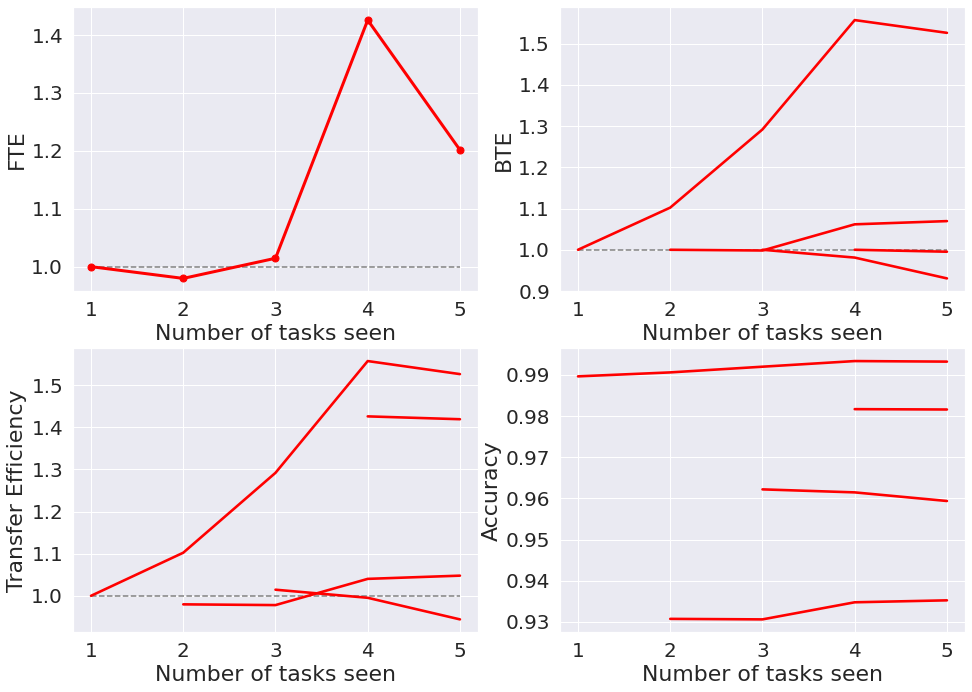

In [8]:
acc, bte, fte, te = fn.calculate_results(accuracy_all_task, num_tasks)
fn.plot_results(acc, bte, fte, te)

### Fashion-MNIST

Next, we do the same for Fashion-MNIST, which contains images of clothing. Each task contains randomly selected images of two pieces of clothing.

We call the function to run the experiment:

In [ ]:
accuracy_all_task = fn.run_experiment(
    FASHION_x_data, FASHION_y_data, num_tasks, num_points_per_task
)

Next, we again calculate the accuracy over tasks, as well as the forwards transfer efficiency (FTE), backwards transfer efficiency (BTE), and the overall transfer efficiency (TE). Given these values, we can plot them as follows:

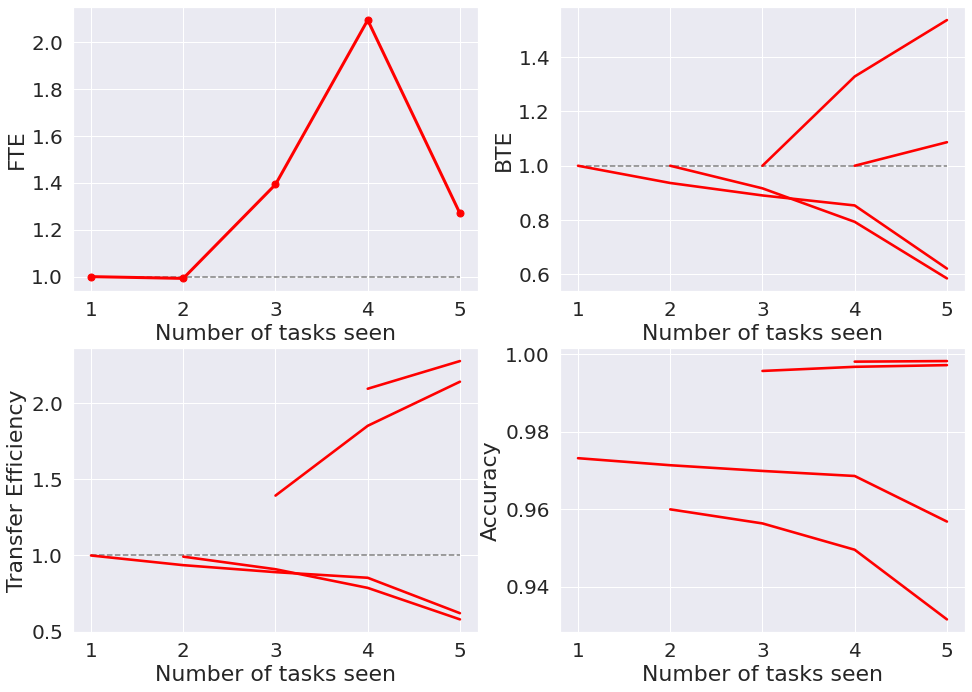

In [12]:
acc, bte, fte, te = fn.calculate_results(accuracy_all_task, num_tasks)
fn.plot_results(acc, bte, fte, te)

## FTE/BTE Between Datasets

Now that the individual datasets' transfer capabilities have been evaluated, let's look at how learning transfers between different datasets.

### Update Hyperparameters

For this, we want to use the first dataset as the first task and the second dataset as the second task, which makes it two tasks of 10 labels each. We therefore update the hyperparameters such that `num_tasks = 2`:

In [12]:
### MAIN HYPERPARAMS ###
model = "uf"
num_tasks = 2
num_trees = 10
num_points_per_task = 500
reps = 100
########################

### Reformat Data

Since we want to train between the datasets,

In [14]:
x_data = np.concatenate((FASHION_x_data, MNIST_x_data))
y_data = np.concatenate((FASHION_y_data, MNIST_y_data + 10))

### MNIST -> Fashion-MNIST

Now, we run the experiment across datasets, calling the function as follows:

In [ ]:
accuracy_all_task = fn.run_experiment(x_data, y_data, num_tasks, num_points_per_task)

Given the accuracies, we calculate accuracies and transfer efficiencies, and then plot the results:

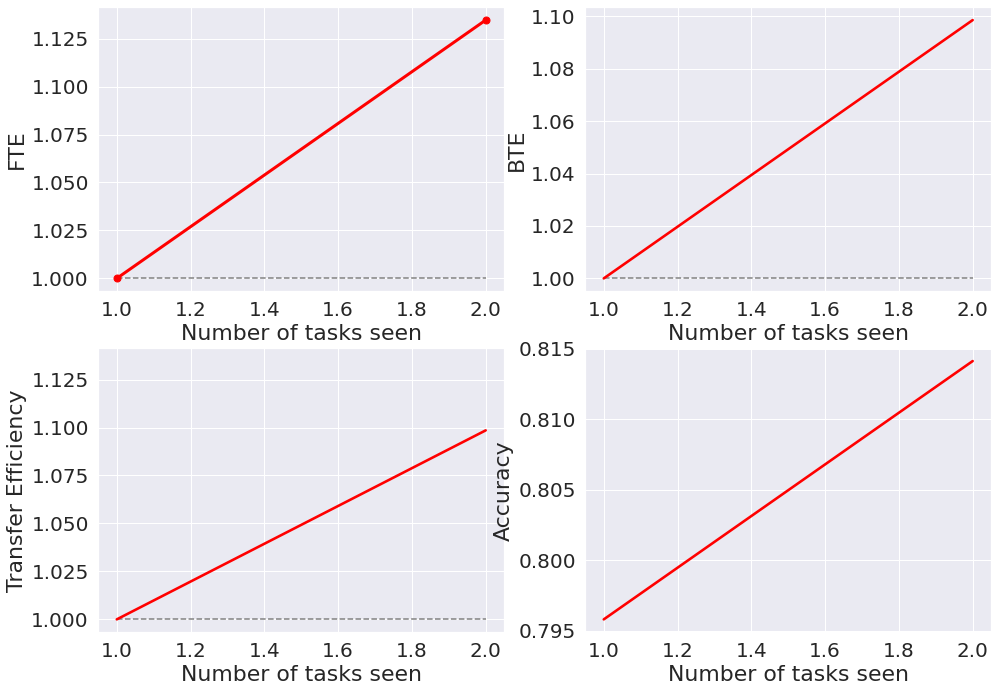

In [16]:
acc, bte, fte, te = fn.calculate_results(accuracy_all_task, num_tasks)
fn.plot_results(acc, bte, fte, te)